In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats

## Загружаем сырые данные

In [192]:
raw_data = pd.read_csv('dset.csv', sep = ';')
raw_data

,Invoice,Quantity
0,489434,12
1,489434,12
2,489434,12
3,489434,48
4,489434,24
...,...,...
944463,575312,6
944464,575312,4
944465,575312,6
944466,575312,12


## Группируем данные по номерам чеков, суммируя количество товаров в каждой позиции

In [193]:
group_data = raw_data.groupby(["Invoice"]).sum()
df = group_data.loc[group_data['Quantity'] > 0]  #Исключаем строки с отрицательным количеством товаров (возвраты)
df = df.sort_values(by=['Quantity'])  #Сортируем для удобства
df

,Quantity
Invoice,
C496350,1
556934,1
556947,1
556948,1
556949,1
...,...
501534,63974
541431,74215
497946,83774


## Строим гистограмму, а также приблизительный график распределения

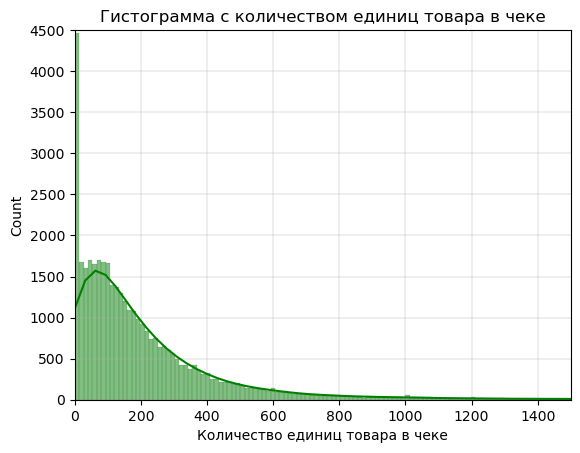

In [194]:
sns.histplot(df['Quantity'][:38900], color = 'green', kde = True)
plt.title("Гистограмма с количеством единиц товара в чеке")
plt.xlabel("Количество единиц товара в чеке")
plt.grid(linewidth=0.3)  # Добавляем сетку
plt.xlim(0, 1500)
plt.ylim(0, 4500)
plt.show()

## Строим статистическое распределение вероятности на основе полученных данных, 
## а также максимально близкое к нему теоретическое распределение (chi2)

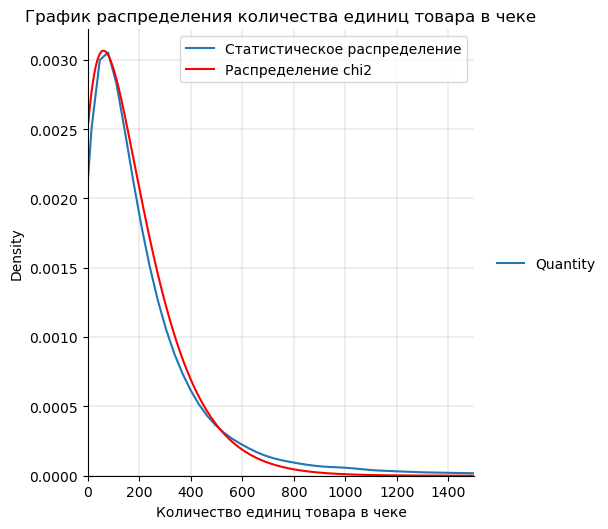

In [190]:
sns.displot(df[:38900], kind='kde', label='Статистическое распределение')  #распределение на основе статистических данных
x = np.linspace(df['Quantity'].min(), df['Quantity'][38900], 38900)  #формируем непрерывный набор значений для графика распределения chi2
plt.plot(x, scipy.stats.chi2.pdf(x, df=4, loc=-60,scale=60), color = 'red', label='Распределение chi2')  #теоретическое chi2 распределение
plt.title("График распределения количества единиц товара в чеке")
plt.xlabel("Количество единиц товара в чеке")
plt.grid(linewidth=0.3)  # Добавляем сетку
plt.xlim(0, 1500)
plt.legend()
plt.show()